In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [2]:
df = pd.read_csv("../data/Salary_Data.csv")
X,Y = df['YearsExperience'],df['Salary']
df.head()

,YearsExperience,Salary,Prediction
0,1.1,39343,35907.212008
1,1.3,46205,37853.452776
2,1.5,37731,39799.693544
3,2.0,43525,44665.295463
4,2.2,39891,46611.536230


Text(0, 0.5, 'Salary')

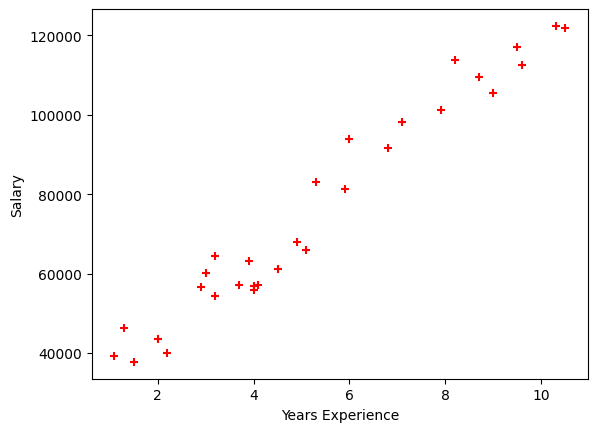

In [3]:
plt.scatter(X,Y,color="red", marker='+')
plt.xlabel("Years Experience")
plt.ylabel("Salary")

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=100)
x_train = x_train[:,np.newaxis]
x_test = x_test[:,np.newaxis]

C:\Users\DELL\AppData\Local\Temp\ipykernel_29064\3828783308.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_train = x_train[:,np.newaxis]
C:\Users\DELL\AppData\Local\Temp\ipykernel_29064\3828783308.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_test = x_test[:,np.newaxis]


In [5]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [6]:
print("Coefficients", model.coef_)
print("Intercept", model.intercept_)

Coefficients [9361.11639032]
Intercept 26819.06511870089


In [7]:
y_predct = model.predict(x_test)
y_predct

array([ 61455.19576289, 115749.67082676, 123238.56393901,  65199.64231902,
        53966.30265063,  64263.53067999])

In [8]:
print("Mean Absolute Error: ",mean_absolute_error(y_test, y_predct))
print("Mean Squared Error: ",mean_squared_error(y_test, y_predct))
print("R2 Score: ",r2_score(y_test, y_predct))


Mean Absolute Error:  4072.3265372536903
Mean Squared Error:  24477109.08965574
R2 Score:  0.9720725422361338


Text(0, 0.5, 'Salary')

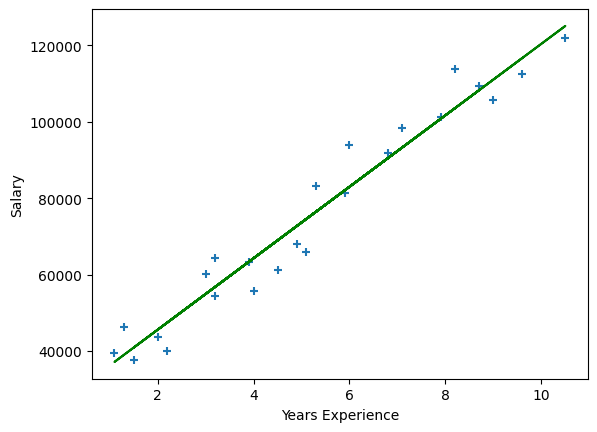

In [9]:
plt.scatter(x_train,y_train, marker="+")
plt.plot(x_train,model.predict(x_train), color="g")
plt.xlabel("Years Experience")
plt.ylabel("Salary")

In [10]:
train_predict = model.predict(df[['YearsExperience']])
train_predict

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([ 37116.29314805,  38988.51642612,  40860.73970418,  45541.29789934,
        47413.52117741,  53966.30265063,  54902.41428967,  56774.63756773,
        56774.63756773,  61455.19576289,  63327.41904096,  64263.53067999,
        64263.53067999,  65199.64231902,  68944.08887515,  72688.53543128,
        74560.75870934,  76432.98198741,  82049.6518216 ,  82985.76346063,
        90474.65657289,  93282.99148998, 100771.88460224, 103580.21951934,
       108260.7777145 , 111069.1126316 , 115749.67082676, 116685.78246579,
       123238.56393901, 125110.78721708])

In [11]:
df["Prediction"] = train_predict
df.head()

,YearsExperience,Salary,Prediction
0,1.1,39343,37116.293148
1,1.3,46205,38988.516426
2,1.5,37731,40860.739704
3,2.0,43525,45541.297899
4,2.2,39891,47413.521177


In [ ]:
df.to_csv("../data/Salary_Data.csv")